In [1]:
from tape import Ensemble, ColumnMapper
import matplotlib.pyplot as plt

# Demo: ZTF Timeseries Exploration with TAPE

In this demo, we'll show a brief example TAPE workflow using ZTF lightcurves. The dataset we'll use is a small half-degree subset of ZTF, hosted here: https://epyc.astro.washington.edu/~lincc-frameworks/half_degree_surveys/ 

The goal of this notebook is to provide example code for working with ZTF data, and using this as the foundation for your own analysis with TAPE and ZTF is highly encouraged.

> **_NOTE:_** This notebook features software that is actively being developed. As such, the workflow and API is subject to change. If using this as the basis for scientific work, we highly encourage you to check the validity of your results.

## Installation and Dependencies

TAPE (>=v0.3.4): https://tape.readthedocs.io/en/latest/gettingstarted/installation.html 
```
pip install lf-tape
```
LSDB (>=v0.1.2): https://lsdb.readthedocs.io/en/latest/
```
pip install lsdb
```

This notebook also requires hipscat>=0.2.5, which should be installed via LSDB

## Reading into TAPE

In [2]:
#Setup Paths
object_path = "https://epyc.astro.washington.edu/~lincc-frameworks/half_degree_surveys/ztf/ztf_object/"
#source_path = "https://epyc.astro.washington.edu/~lincc-frameworks/half_degree_surveys/ztf/ztf_source/"
# optionally can use Zubercal for sources (observations) instead
source_path = "https://epyc.astro.washington.edu/~lincc-frameworks/half_degree_surveys/ztf/zubercal_source/"

In [3]:
# Loading into TAPE

#First initialize an Ensemble
ens = Ensemble(client=False)

# You may also want to try using a distributed client, opening up access to helpful resources
# like the dask dashboard: https://docs.dask.org/en/latest/dashboard.html
#from dask.distributed import Client
#client = Client(n_workers=4)
#ens = Ensemble(client=client)

# The ColumnMapper maps dataset columns to a few timeseries quantities
"""
colmap = ColumnMapper(
        id_col='_hipscat_index',
        time_col='mjd',
        flux_col='mag',
        err_col='magerr',
        band_col='band',
      )
"""

colmap = ColumnMapper().use_known_map("ZTF", hipscat=True)

# Load directly from hipscat
ens.from_hipscat(source_path, 
                 object_path, 
                 column_mapper=colmap, 
                 object_index="ps1_objid", 
                 source_index="ps1_objid")

# Let's view the first 5 objects
ens.object.head(5, npartitions=-1)

,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,
7800225727302860800,119401800806389297,180.080612,9.507394,22.173000,21.406799,21.110201,2,58,43,21.473381,21.120960,20.778615,3,0,432
7800225745451614208,119411800883926241,180.088298,9.513106,22.120899,21.247700,21.200100,8,61,35,21.678477,21.137031,20.751898,3,0,432
7800225756323250176,119421800896420844,180.089417,9.516941,-999.000000,21.367701,20.787399,0,8,70,NaN,21.490156,20.410343,3,0,432
7800231075577331712,119401800190982050,180.019073,9.501332,-999.000000,21.469801,21.638901,0,4,29,NaN,21.246716,20.937397,3,0,432
7800231096259444736,119401800023320772,180.002162,9.500095,22.058500,21.346800,21.107500,5,36,39,21.144858,21.188998,20.805108,3,0,432


In [4]:
# Take a peek at the sources (observations)

ens.source.head(5, npartitions=-1)

,index,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,...,catflags,fieldID,mag,magerr,mjd,rcID,band,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
7800225727302860800,13716,119401800806389297,180.080612,9.507394,22.173,21.406799,21.110201,2,58,43,...,0,524,20.881659,0.200647,58906.38457,5,i,6,20000,27711
7800225727302860800,13716,119401800806389297,180.080612,9.507394,22.173,21.406799,21.110201,2,58,43,...,0,524,20.822243,0.196191,58904.40393,5,i,6,20000,27711
7800225727302860800,13716,119401800806389297,180.080612,9.507394,22.173,21.406799,21.110201,2,58,43,...,0,524,20.826902,0.196541,58906.36557,5,i,6,20000,27711
7800225727302860800,13716,119401800806389297,180.080612,9.507394,22.173,21.406799,21.110201,2,58,43,...,0,524,21.318825,0.234392,59321.29592,5,r,6,20000,27711
7800225727302860800,13716,119401800806389297,180.080612,9.507394,22.173,21.406799,21.110201,2,58,43,...,0,524,20.771994,0.192423,58908.36537,5,i,6,20000,27711


Text(0, 0.5, 'Dec')

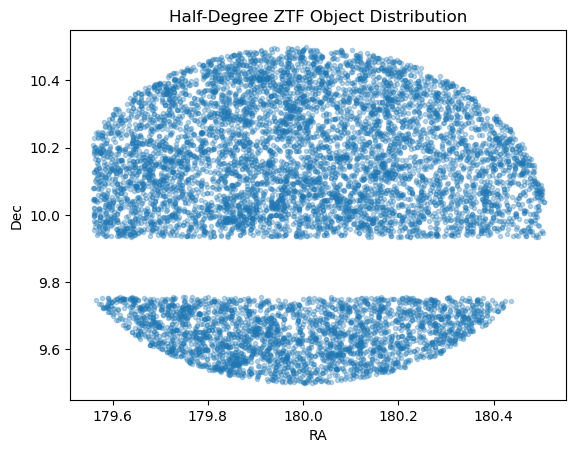

In [5]:
# Plot the distribution of data on the sky

plt.plot(ens.object["ra"].compute(), ens.object["dec"].compute(), ".", alpha=0.3)
plt.title("Half-Degree ZTF Object Distribution")
plt.xlabel("RA")
plt.ylabel("Dec")

## Filtering and Analysis

In [6]:
# Filtering

# make sure there's some r data in each lightcurve
ens.object.query("nobs_r > 10").update_ensemble() # we update the ensemble to use the new object table

# removes any lightcurves with less than 200 total observations
ens.prune(200) # we don't need to update_ensemble() as this function operated directly on the ensemble

Selected Object 7824287874940928000 from Partition 5


,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix,nobs_total
_hipscat_index,,,,,,,,,,,,,,,,
7824287874940928000,119651797665173395,179.766434,9.710803,18.2239,17.006901,15.7091,282,361,129,18.28503,16.80089,15.445316,3,0,434,772


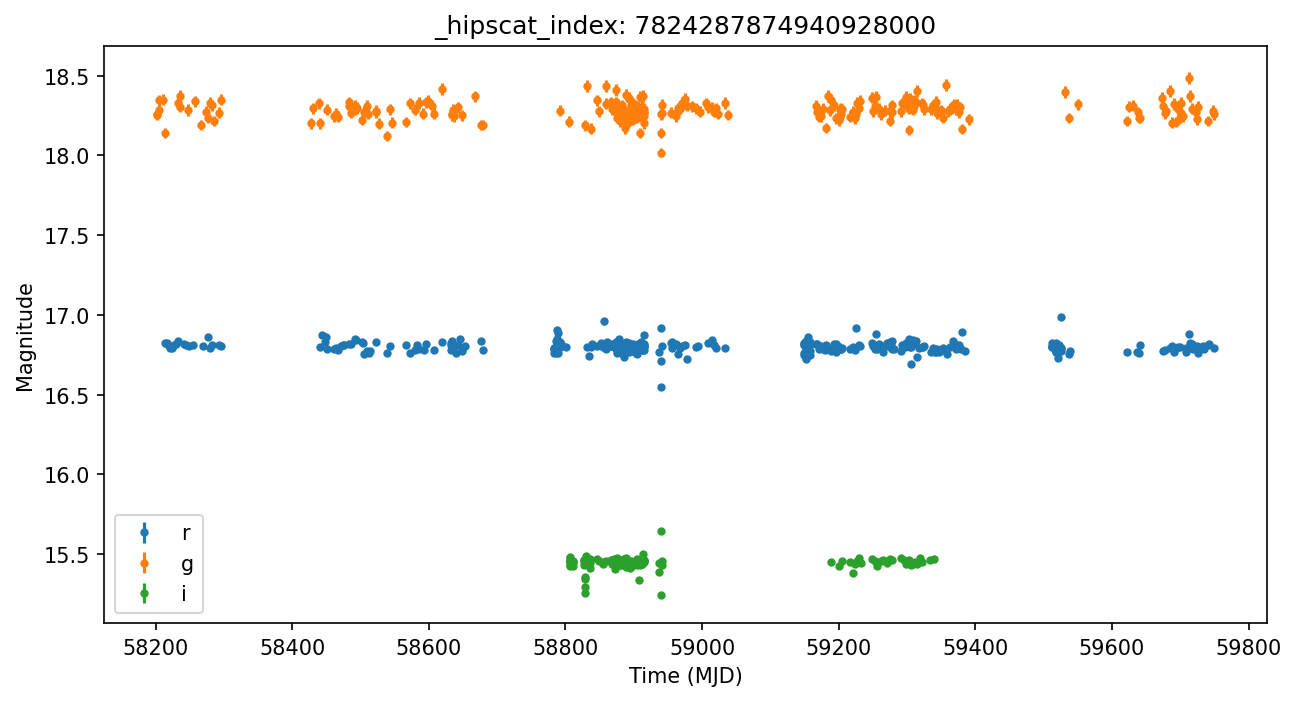

In [7]:
# Let's plot a lightcurve

# We'll select one randomly
ts = ens.select_random_timeseries(seed=1)  # seed provides a reproducible result

# Iterate through each band and plot
fig, ax = plt.subplots(1,1,figsize=(10,5), dpi=150)
for band in ts.data["band"].unique():
    band_ts = ts.data[ts.data["band"] == band]
    ax.errorbar(band_ts["mjd"], band_ts["mag"], yerr=band_ts["magerr"], fmt='.', label=f"{band}")

ax.set_title(f'_hipscat_index: {ts.meta["id"]}')
ax.set_ylabel("Magnitude")
ax.set_xlabel("Time (MJD)")
ax.legend()

# Find the object level information for our randomly selected timeseries
ens.object.loc[ts.meta["id"]].compute()

In [8]:
# Calculate Stetson K Metric for all lightcurves using the light_curve package
# Available Features: https://github.com/light-curve/light-curve-python?tab=readme-ov-file#available-features
from light_curve import StetsonK
stetson_k = StetsonK()

# Batch applies the function to all lightcurves
# TAPE automatically passes the appropriate columns to functions in the light_curve feature package
stet_ks = ens.batch(stetson_k, band_to_calc="r")
stet_ks.head(5, npartitions=-1)

Using generated label, result_1, for a batch result.


,stetson_K
_hipscat_index,
7800231189779841024,0.769100
7800231210621337600,0.673795
7800231224164745216,0.718060
7800231386677248000,0.686567
7800231482529677312,0.713908


In [9]:
# Let's assign this new column to the object table
ens.object.assign(stetson_K = stet_ks["stetson_K"]).update_ensemble()

In [10]:
ens.object # can see stetson_K column is now present

,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix,nobs_total,stetson_K
npartitions=7,,,,,,,,,,,,,,,,,
7782220156096217088,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,int64,float64
7799953079628988416,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836263351624663040,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Text(0, 0.5, 'Frequency')

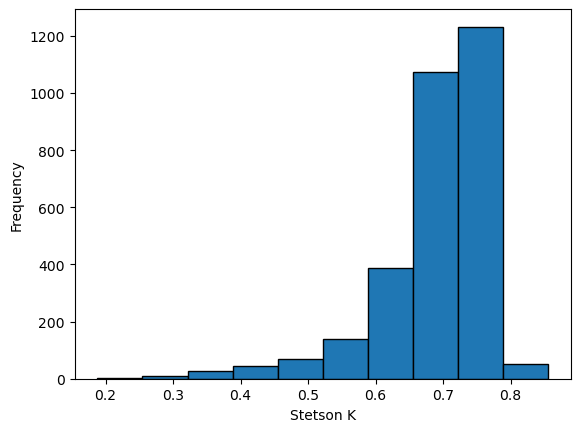

In [11]:
# Let's plot the distribution of stetson_k values
plt.hist(ens.object["stetson_K"], edgecolor="k")

plt.xlabel("Stetson K")
plt.ylabel("Frequency")

In [12]:
ens.source.columns

Index(['index', 'ps1_objid', 'ra', 'dec', 'ps1_gMeanPSFMag', 'ps1_rMeanPSFMag',
       'ps1_iMeanPSFMag', 'nobs_g', 'nobs_r', 'nobs_i', 'mean_mag_g',
       'mean_mag_r', 'mean_mag_i', 'catflags', 'fieldID', 'mag', 'magerr',
       'mjd', 'rcID', 'band', 'Norder', 'Dir', 'Npix'],
      dtype='object')